## Lecture 7: Big data: Challenges and Solutions

### MIT Practical Computing Tutorials for Earth Scientists
<hr>

#### `xarray`: N-D labeled arrays and datasets in Python

##### About xarray

From their [website](http://xarray.pydata.org/en/stable/):

>`xarray` (formerly xray) is an open source project and Python package that makes working with labelled multi-dimensional arrays simple, efficient, and fun!
>
>Xarray introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. The package includes a large and growing library of domain-agnostic functions for advanced analytics and visualization with these data structures.
>
>Xarray is inspired by and borrows heavily from pandas, the popular data analysis package focused on labelled tabular data. It is particularly tailored to working with netCDF files, which were the source of xarray’s data model, and integrates tightly with dask for parallel computing.

In [1]:
import xarray as xr

##### Example: revisiting the `netCDF4` example of topographic elevation in the region surrounding Cold Bay, Alaska

In [4]:
ds = xr.open_dataset("../Lecture02_Objects_and_data_analysis/data/cold_bay_alaska_elevation.nc")
ds

<xarray.Dataset>
Dimensions:  (lat: 1351, lon: 1351)
Coordinates:
  * lat      (lat) float64 53.0 53.0 53.0 53.01 53.01 ... 55.99 56.0 56.0 56.0
  * lon      (lon) float64 -164.5 -164.5 -164.5 -164.5 ... -161.5 -161.5 -161.5
Data variables:
    crs      |S1 ...
    Band1    (lat, lon) float32 ...
Attributes:
    GDAL_AREA_OR_POINT:              Point
    Conventions:                     ACDD 1.3, CF-1.6
    GDAL:                            GDAL 1.11.4, released 2016/01/25
    history:                         Tue Jul 26 17:48:38 2016: GDAL CreateCop...
    title:                           Cold Bay, Alaska 8 arc-second Coastal Di...
    GMT_version:                     4.5.13 [64-bit]
    node_offset:                     1
    summary:                         NOAA's National Geophysical Data Center ...
    keywords:                        Earth Science > Oceans > Bathymetry/Seaf...
    time_coverage_start:             1901-01-01
    time_coverage_end:               2012-01-01
    id:                              4955
    naming_authority:                gov.noaa.ngdc.mgg.dem
    source:                          NOS Hydrographic Surveys; Bench Mark Dat...
    comment:                         Developed for the University of Alaska a...
    license:                         Not to be used for navigation. Although ...
    creator_name:                    DOC/NOAA/NESDIS/NCEI > National Centers ...
    creator_email:                   dem.info@noaa.gov
    creator_url:                     http://www.ngdc.noaa.gov/mgg/dem
    project:                         ICSU-WDS > International Council for Sci...
    geospatial_bounds_crs:           World Geodetic System 1984
    geospatial_bounds_vertical_crs:  Mean Higher High Water height
    publisher_name:                  NOAA National Center for Environmental I...
    publisher_email:                 dem.info@noaa.gov
    publisher_url:                   http://www.ngdc.noaa.gov/mgg/dem
    geospatial_lat_min:              53.00
    geospatial_lat_max:              56.00
    geospatial_lon_min:              -164.50
    geospatial_lon_max:              -161.50
    cdm_data_type:                   Grid
    date_issued:                     2014-01-02; publication
    date_metadata_modified:          2016-07-28
    product_version:                 1
    keywords_vocabulary:             CF Standard Name Table v27
    references:                      Digital Elevation Models of Cold Bay and...
    creator_type:                    group or institution
    creator_institution:             DOC/NOAA/NESDIS/NCEI > National Centers ...
    publisher_type:                  institution
    geospatial_lat_units:            decimal degrees
    geospatial_lon_units:            decimal degrees
    geospatial_lon_resolution:       0.0022222222
    geospatial_lat_resolution:       0.0022222222
    geospatial_vertical_resolution:  0.0022222222

`xarray.Dataset` objects are fully meta-data aware – much more so than the `netCDF4.Dataset` objects above.

Variables like `lat` and `lon` which describe dimensions are represented as `Coordinates`.

In [382]:
ds.coords

Coordinates:
  * lat      (lat) float64 53.0 53.0 53.0 53.01 53.01 ... 55.99 56.0 56.0 56.0
  * lon      (lon) float64 -164.5 -164.5 -164.5 -164.5 ... -161.5 -161.5 -161.5

Data variables such as `Band1` are `xarray.DataArray` objects, which links an N-dimensional arrays of a variable's values with it's coordinates and various attributes (e.g. units).

In [383]:
ds['Band1']

<xarray.DataArray 'Band1' (lat: 1351, lon: 1351)>
[1825201 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 53.0 53.0 53.0 53.01 53.01 ... 55.99 56.0 56.0 56.0
  * lon      (lon) float64 -164.5 -164.5 -164.5 -164.5 ... -161.5 -161.5 -161.5
Attributes:
    long_name:     GDAL Band Number 1
    grid_mapping:  crs
    units:         meters
    positive:      up

Underlying all of the metadata infrastructure is `numpy.Array` containing the variable's values:

In [384]:
ds['Band1'].values

array([[-4315.022   , -4310.901   , -4308.1685  , ..., -5232.706   ,
        -5216.3916  , -5210.885   ],
       [-4295.62    , -4291.772   , -4289.575   , ..., -5250.371   ,
        -5240.815   , -5233.7905  ],
       [-4256.6445  , -4258.5547  , -4258.311   , ..., -5229.3467  ,
        -5226.7207  , -5227.6055  ],
       ...,
       [  -91.729645,   -91.94089 ,   -92.047386, ...,   -27.725378,
          -27.651352,   -27.67808 ],
       [  -91.61961 ,   -91.689865,   -91.80033 , ...,   -29.278463,
          -28.086462,   -27.678217],
       [  -91.48    ,   -91.50936 ,   -91.62949 , ...,   -29.482727,
          -29.479567,   -29.442062]], dtype=float32)

Because `xarray.DataArray` objects are meta-data aware, they include useful Python `methods` such as the `xarray.DataAraray.plot()` method, which automatically knows how to label axes and colorbars (including units!)

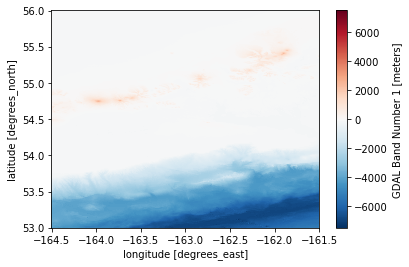

In [385]:
ds['Band1'].plot()

The which picks one of the follow plot types depending on the number of dimensions:
- `matplotlib.pyplot.plot()` line plots for 1-dimensional data
- `matplotlib.pyplot.pcolormesh()` colormaps for 2-dimensional data
- `matplotlib.pyplot.hist()` plots a histogram of values for data with more than 2 dimensions

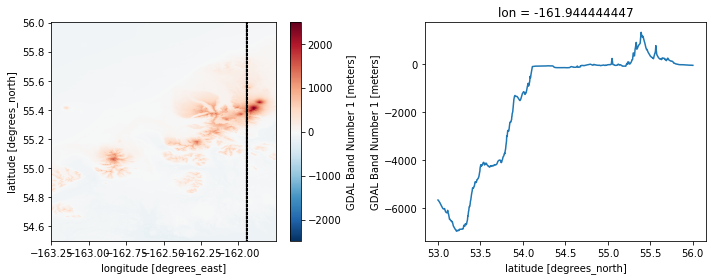

In [386]:
lon_index = 1150

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
ds['Band1'].sel(lon=slice(-163.25, -161.75), lat=ds['lat'][lat_idx]).plot()
plt.plot(
    ds['lon'].isel(lon=lon_index).values * np.ones_like(ds['Band1'].isel(lon=lon_index)),
    ds['Band1'].isel(lon=lon_index),
    "k:"
)

plt.subplot(1,2,2)
ds['Band1'].isel(lon=lon_index).plot()

plt.tight_layout()